In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split

In [7]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
X_train = np.load('/content/gdrive/MyDrive/data/Augmented1/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/Augmented1/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/Augmented1/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/Augmented1/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/Augmented1/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/Augmented1/y_val.npy')

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


In [8]:
inputs = Input(shape=(98,1))
conv1 = Conv1D(32, 5, activation='relu',kernel_regularizer=l2(0.01))(inputs)
pool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(64, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(2)(conv2)
conv3 = Conv1D(128, 5, activation='relu')(pool2)
pool3 = MaxPooling1D(2)(conv3)

gru1 = GRU(128, return_sequences=True)(pool3)
gru1 = Dropout(0.2)(gru1)
lstm1 = LSTM(128)(gru1)

dense1 = Dense(32, activation='softmax')(lstm1)
dense1 = Dropout(0.5)(dense1)

outputs = Dense(2, activation='softmax')(dense1)

In [9]:
model = Model(inputs = inputs, outputs = outputs)

In [10]:
optimizer=tf.keras.optimizers.Adam(amsgrad=True, name='Adam')

In [11]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

In [12]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Epoch 1/120
528/528 [==============================] - 24s 14ms/step - loss: 0.6059 - accuracy: 0.6836 - val_loss: 0.4177 - val_accuracy: 0.8846
Epoch 2/120
528/528 [==============================] - 8s 15ms/step - loss: 0.3919 - accuracy: 0.8801 - val_loss: 0.2940 - val_accuracy: 0.9148
Epoch 3/120
528/528 [==============================] - 10s 19ms/step - loss: 0.3135 - accuracy: 0.9025 - val_loss: 0.2317 - val_accuracy: 0.9334
Epoch 4/120
528/528 [==============================] - 8s 14ms/step - loss: 0.2665 - accuracy: 0.9241 - val_loss: 0.2257 - val_accuracy: 0.9258
Epoch 5/120
528/528 [==============================] - 5s 9ms/step - loss: 0.2501 - accuracy: 0.9273 - val_loss: 0.2028 - val_accuracy: 0.9397
Epoch 6/120
528/528 [==============================] - 6s 10ms/step - loss: 0.2242 - accuracy: 0.9339 - val_loss: 0.1903 - val_accuracy: 0.9363
Epoch 7/120
528/528 [==============================] - 6s 10ms/step - loss: 0.2131 - accuracy: 0.9383 - val_loss: 0.1853 - val_accuracy

In [13]:
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9791
[0.11050739884376526, 0.9791370034217834]


In [14]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=e5da30381102e6889fa18eece4a41033d4db9a964d001b0eec023031ded8447a
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=d8c41911dcedab11b4dead85932764378b5d77a92565f15d7ce82d85847b2aa6
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

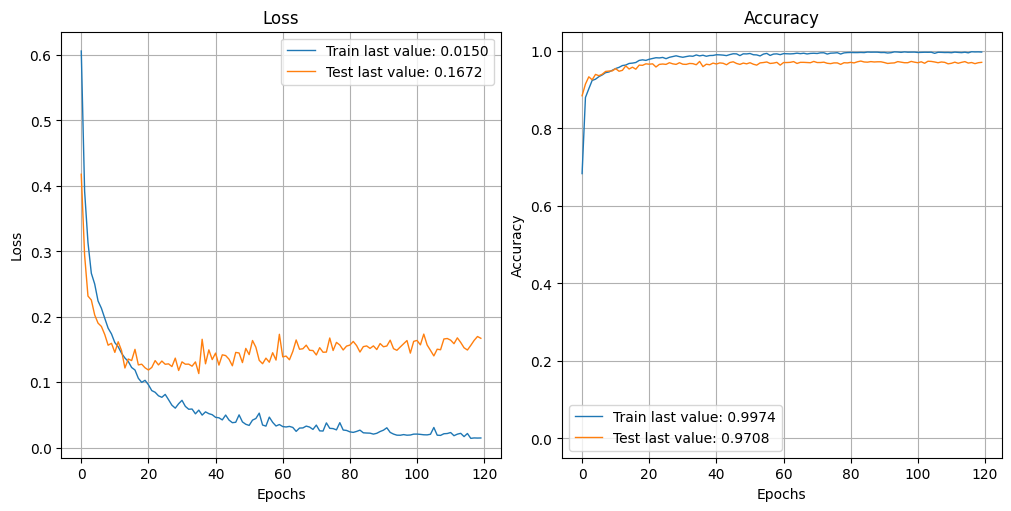

In [15]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [16]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1049
           1       0.97      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1022   27]
 [  17 1043]]


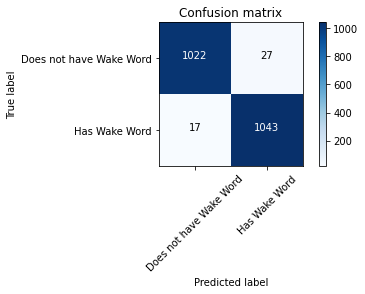

In [17]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])